In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df=pd.read_csv("Week7_test.csv")
print(df.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [3]:
df1=pd.read_csv("Week7_train.csv")

print(df1.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
df.shape


(28000, 784)

In [4]:
df1.shape


(42000, 785)

In [8]:
from sklearn.model_selection import train_test_split
df_sample=df1.sample(frac=0.1,random_state=42)
df_sample

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4867,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28123,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3780,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:

unique_labels = df_sample["label"].nunique()

print("No of classes : ", unique_labels)


No of classes :  10


In [32]:
uniq=df_sample["label"].unique()

In [9]:
y = df_sample.iloc[:,0]
x = df_sample.iloc[:,1:]


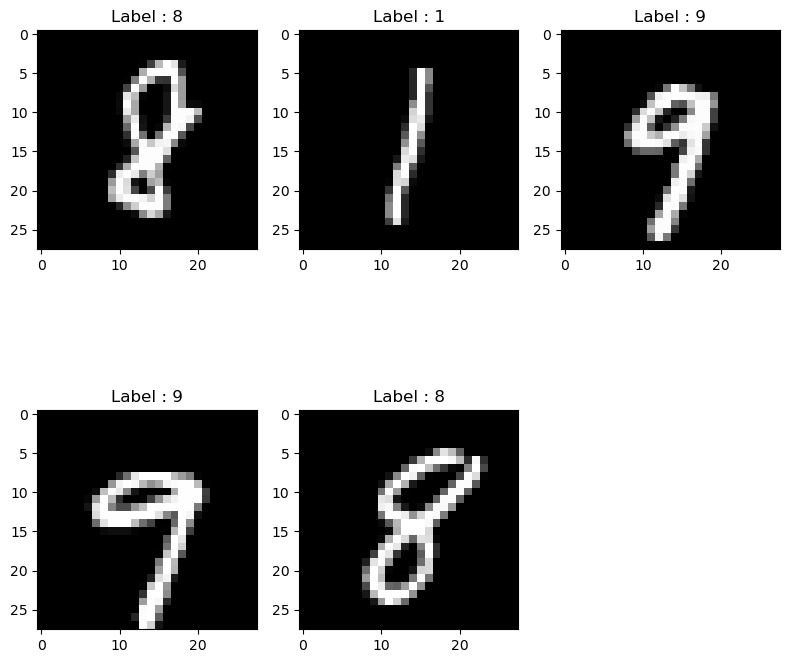

In [9]:

fig, axes = plt.subplots(2,3,figsize=(8,8))
axes = axes.flatten()

#  here x.iloc gives series ds
#  values converts series to numpy 1d array
# reshape it to 2d array since image represetion is a 2d plane of pixels

for i in range(5):
    cur_ax = axes[i]
    img = x.iloc[i].values.reshape(28,28)
    cur_ax.imshow(img,cmap="grey")
    cur_ax.set_title(f"Label : {y.iloc[i]}")

#  delaxes deleted the specifed axes reference
plt.delaxes(axes[-1]) 
plt.tight_layout()
plt.show()

In [15]:
df_sample['label'].value_counts()

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [ ]:
df_sample.iloc[:,0].value_counts()

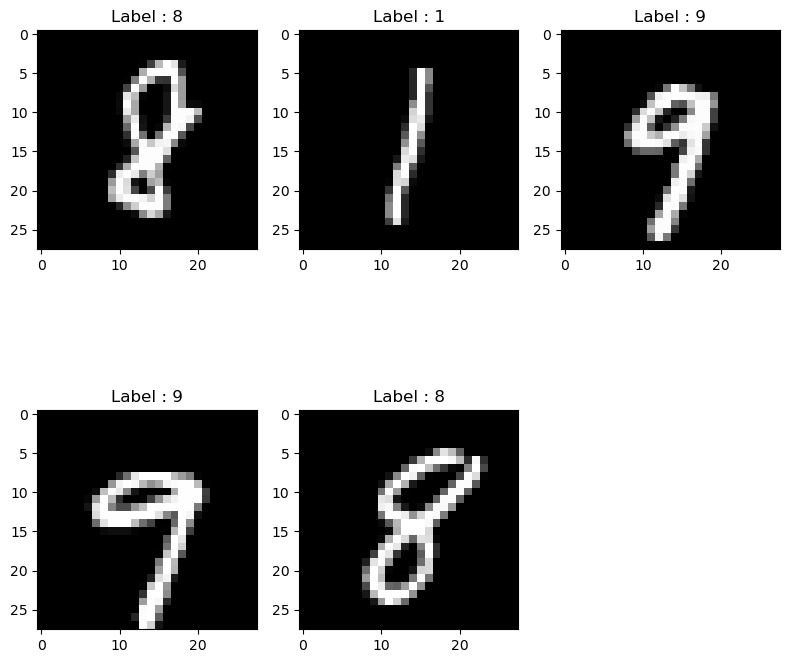

In [13]:

fig, axes = plt.subplots(2,3,figsize=(8,8))
axes = axes.flatten()

#  here x.iloc gives series ds
#  values converts series to numpy 1d array
# reshape it to 2d array since image represetion is a 2d plane of pixels

for i in range(5):
    cur_ax = axes[i]
    img = x.iloc[i].values.reshape(28,28)
    cur_ax.imshow(img,cmap="grey")
    cur_ax.set_title(f"Label : {y.iloc[i]}")

#  delaxes deleted the specifed axes reference
plt.delaxes(axes[-1]) 
plt.tight_layout()
plt.show()

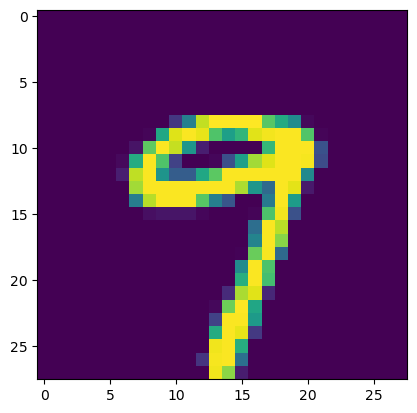

In [20]:
plt.imshow(x.iloc[3].values.reshape(28,28))

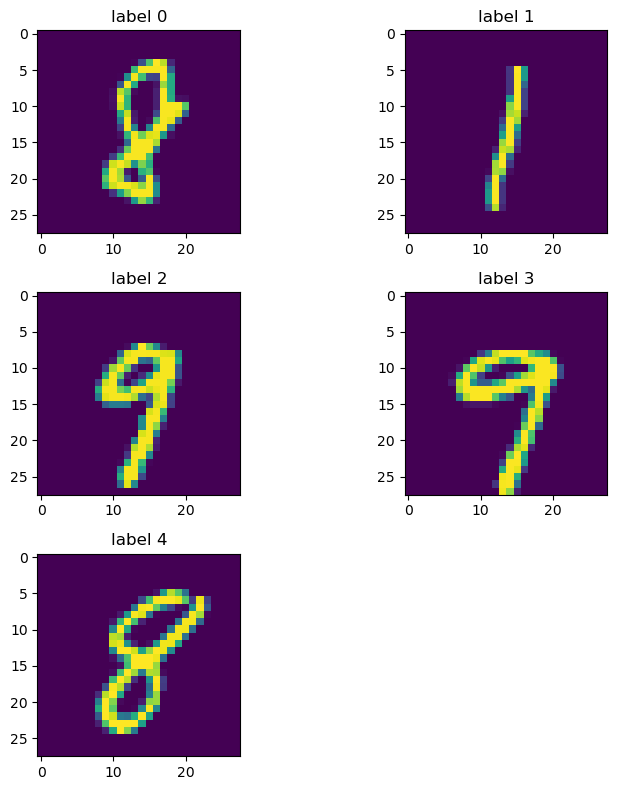

In [30]:
fig,axes=plt.subplots(3,2,figsize=(8,8))

axes=axes.flatten()
for i in range(5):
    a_c= axes[i]
    a_c.imshow(x.iloc[i].values.reshape(28,28))
    a_c.set_title(f"label {i}")
    
plt.delaxes(axes[-1])
plt.tight_layout()

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
model=KNeighborsClassifier(metric='minkowski',p=2,n_neighbors=5)

model.fit(x,y)

KNeighborsClassifier()

In [44]:
y_predict=model.predict(x)

y_predict[:5]

array([8, 1, 9, 9, 8])

In [48]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       408
           1       0.89      1.00      0.94       471
           2       0.98      0.92      0.95       420
           3       0.94      0.96      0.95       506
           4       0.96      0.95      0.96       397
           5       0.96      0.94      0.95       339
           6       0.97      0.98      0.98       402
           7       0.94      0.94      0.94       438
           8       0.98      0.88      0.93       403
           9       0.92      0.93      0.93       416

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.95      0.95      0.95      4200



In [52]:
print(confusion_matrix(y,y_predict))

[[405   0   0   1   0   0   2   0   0   0]
 [  0 469   1   0   0   0   1   0   0   0]
 [  3  15 387   1   1   0   0   8   4   1]
 [  1   5   3 487   0   3   0   4   1   2]
 [  0   4   0   0 377   0   2   2   0  12]
 [  3   3   0   9   2 317   2   0   1   2]
 [  2   1   0   0   0   4 394   1   0   0]
 [  0  16   1   0   2   0   0 412   0   7]
 [  1   9   1  13   4   7   4   2 353   9]
 [  4   3   2   5   5   0   0   9   0 388]]


NameError: name 'x_test' is not defined

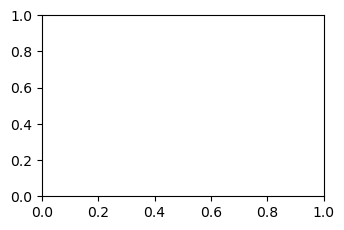

In [62]:
#fig,axes=plt.subplots(3,2,figsize=(8,8))
plt.figure(figsize=(8,8))
for i in range(5):
    plt.subplot(3,2,i+1)
    a_c=axes[i]
    plt.imshow(x_test.iloc[i].values.reshape(28,28))
    
    